### Shuffle the data and then divide it equally into five parts, and ask colleagues for assistance in double manual verification.

In [1]:
import random
import os
import pandas as pd  # pip 
import numpy as np  # pip
random.seed(992)  # random seed

In [2]:
def view_data(data):
    print("The shape of data: ", data.shape)
    print("The first 20 rows: \n", data.head(20))

In [3]:
# manually operate the COPY of "processed_data_after_manual.xlsx" file:
# ("processed_data_after_manual.xlsx" was just there without any change)
# delete the "augmentation" sheet, 
# remove columns under different preprocessing approaches from the "processed" sheet, 
# such as lemm (lemmatization) and stem (stemming)
data_path = "./data/kappa_version.xlsx"  
data = pd.read_excel(data_path, sheet_name = "processed")
view_data(data)

The shape of data:  (5289, 6)
The first 20 rows: 
     manual_index                                            content  length  \
0          63864  ver 12.14.1, delete all data menu not function...      23   
1          37176  used to be good. too many pop ups, ads article...      13   
2          40583  i couldn't even sign up i contacted fliphelp n...      12   
3          18714  for what i know about this app and it works re...      19   
4          47785  love the app, though on occasions what is play...      95   
5          55017  one of the best ways to store your pictures an...      21   
6          32254  x formally twitter is a good place to chat abo...      25   
7          51699  this application is organized for only showing...      23   
8           4886  everything is good but whatapp please update y...       9   
9           2210  i enabled two factor authentication in faceboo...      18   
10         52600  why did u auto enabled ai data sharing feature...      11   
1

In [4]:
# all the data was requested but with the random order
shuffled_data = data.sample(frac=1, random_state=68).reset_index(drop=True)

split_data = np.array_split(shuffled_data, 5)  # 5 people

for i, part in enumerate(split_data):
    print(f"The size of part {i+1}: {part.shape}")  # print the size of each part

save_path = "./data/"
if not os.path.exists(save_path):
    os.makedirs(save_path)

for i, part in enumerate(split_data):
    file_name = f"kappa_part_{i+1}.xlsx"  # the name of each file
    full_path = os.path.join(save_path, file_name)  # the address of each downloaded file
    part.to_excel(full_path, index=False)  # save them as seperate files

    print(f"Already saved: {full_path}")  # print the state

The size of part 1: (1058, 6)
The size of part 2: (1058, 6)
The size of part 3: (1058, 6)
The size of part 4: (1058, 6)
The size of part 5: (1057, 6)
Already saved: ./data/kappa_part_1.xlsx
Already saved: ./data/kappa_part_2.xlsx
Already saved: ./data/kappa_part_3.xlsx
Already saved: ./data/kappa_part_4.xlsx
Already saved: ./data/kappa_part_5.xlsx


### Generate a file containing the same content as reviews after filtering, indexed by "manual_index", but with their original emotion scores and labels, which were generated by the SentiStrength API and had not been manually checked.

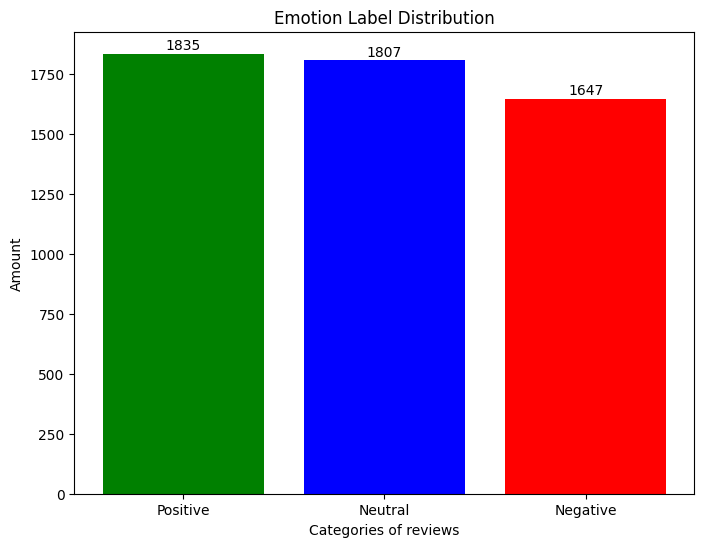

In [7]:
import pandas as pd  # pip
import matplotlib.pyplot as plt  # pip


def draw_distribution(data):
    # draw a bar chart to describe emotion label distribution based on SentiStrength api
    positive_amount = data[data["emotion_label"] == "positive"].shape[0]
    neutral_amount = data[data["emotion_label"] == "neutral"].shape[0]
    negative_amount = data[data["emotion_label"] == "negative"].shape[0]
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(["Positive", "Neutral", "Negative"], [positive_amount, neutral_amount, negative_amount], color=["green", "blue", "red"])
    plt.title("Emotion Label Distribution")
    plt.xticks(["Positive", "Neutral", "Negative"])
    plt.xlabel("Categories of reviews")
    plt.ylabel("Amount")
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha="center", va="bottom")  # show the exact digits
    plt.show()


data_without_manual = pd.read_excel("./data/original_manual_check_data_COPY.xlsx", sheet_name = "original")
data_after_manual   = pd.read_excel("./data/kappa_version.xlsx", sheet_name = "processed")

# To compare the impact of manual checking on the model:
# perform an inner join using the manual_index in "kappa_version.xlsx" file 
# to extract app reviews data that was not deleted (filtered) during manual checking from the original data file,
# save their original emotion scores and labels, which were all based on SentiStrength API.

# data_after_manual[['manual_index']] prevented score and label conflicts between two files
merged_data = pd.merge(data_without_manual, data_after_manual[['manual_index']], on="manual_index", how="inner")
draw_distribution(merged_data)

merged_data.to_excel("./data/filtered_data_without_manual_check.xlsx", index = False)  # need "pip install openpy" command in the terminal

### Visualization Investigation of the Number of Citations and Publication Dates of Model Papers.

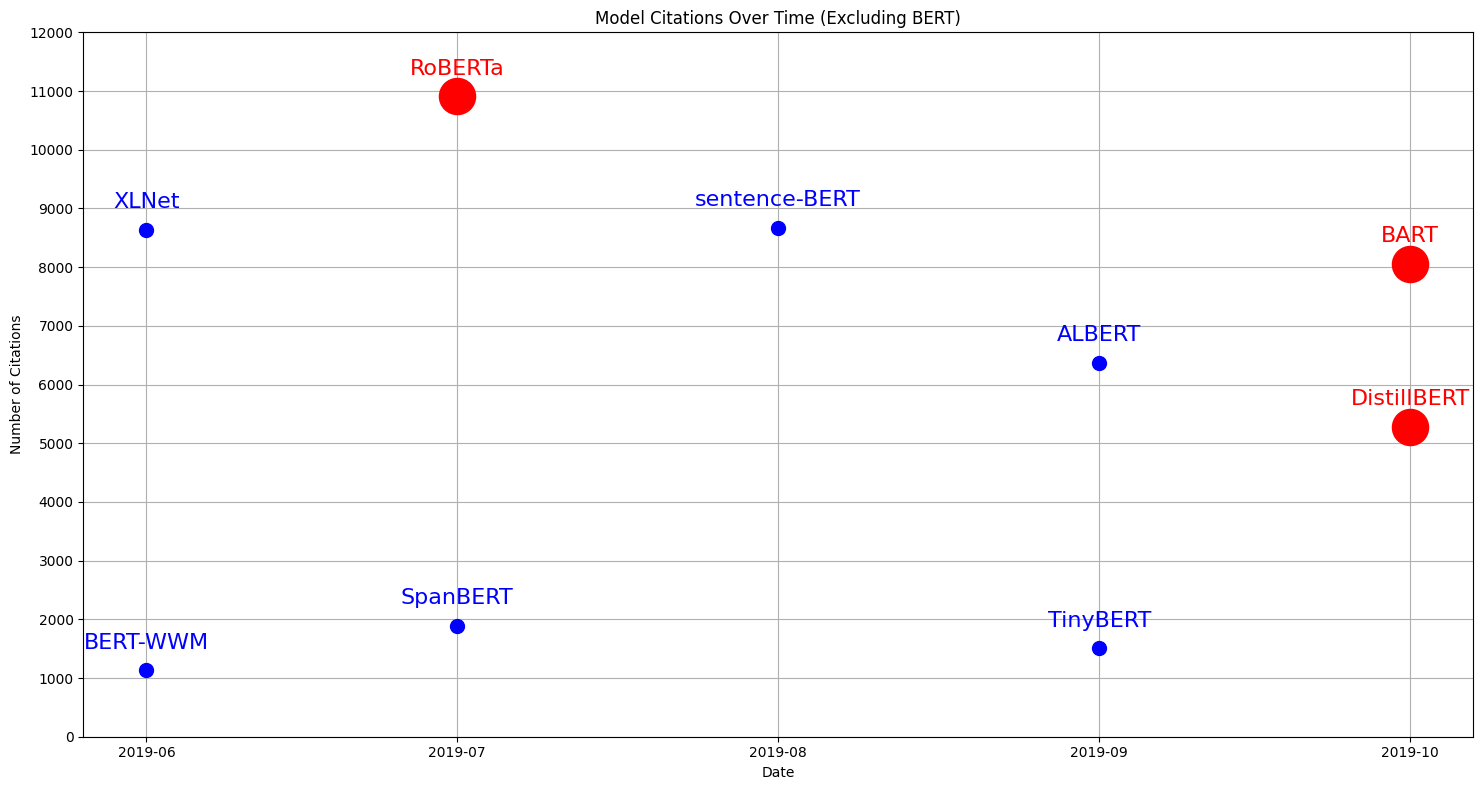

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
data = {
    "Model": ["XLNet", "BERT-WWM", "RoBERTa", "SpanBERT", "sentence-BERT", "ALBERT", "TinyBERT", "DistillBERT", "BART"],
    "Citations": [8634, 1130, 10910, 1886, 8672, 6365, 1504, 5276, 8054],
    "Date": ["2019.6", "2019.6", "2019.7", "2019.7", "2019.8", "2019.9", "2019.9", "2019.10", "2019.10"]
}  # recorded in 2024-02-13

data["Date"] = pd.to_datetime(data["Date"], format='%Y.%m')
data = pd.DataFrame(data)
data = data.sort_values(by="Date")

plt.figure(figsize=(15, 8))
for i, row in data.iterrows():
    color = "red" if row["Model"] in ["RoBERTa", "BART", "DistillBERT"] else "blue"
    markersize = 26 if row["Model"] in ["RoBERTa", "BART", "DistillBERT"] else 10
    plt.plot(row["Date"], row["Citations"], 'o', color=color, markersize=markersize)
    plt.text(row["Date"], row["Citations"] + 300, f"{row['Model']}", fontsize=16, ha='center', va='bottom', color=color)

plt.title("Model Citations Over Time (Excluding BERT)")
plt.xlabel("Date")
plt.ylabel("Number of Citations")
plt.xticks(pd.date_range(start=min(data["Date"]), end=max(data["Date"]), freq="MS"))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.yticks(range(0, max(data["Citations"])+2000, 1000))
plt.grid(True)
plt.tight_layout()

plt.savefig("visualization_investigation.png")

plt.show()

# Statistical data on the length of app reviews.

unique labels: ['neutral' 'negative' 'positive']
The Maximum value of lengths: 417
The Minimum value of lengths: 8
length mean:  28.437511816978635
length median:  21.0
length_mode: 8 for 266 times
[13. 21. 37.]
First quartile: 13.0
Third quartile: 37.0


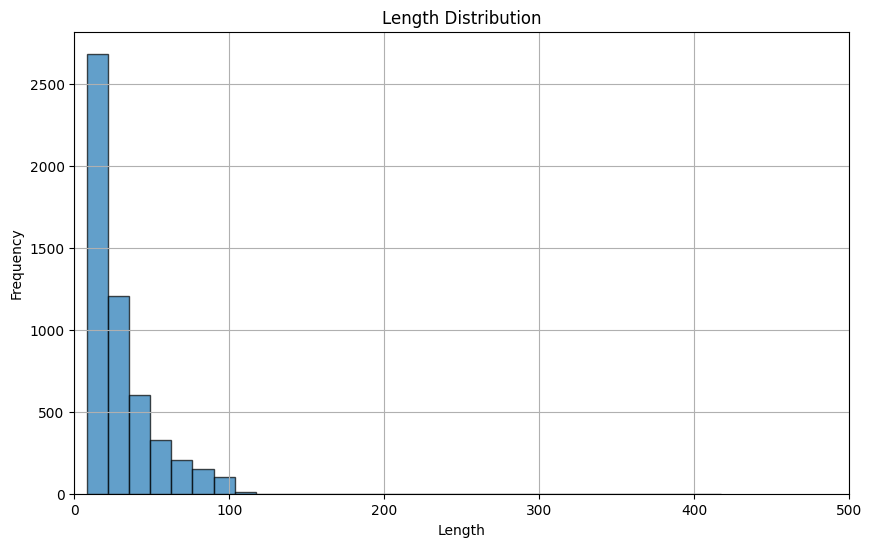

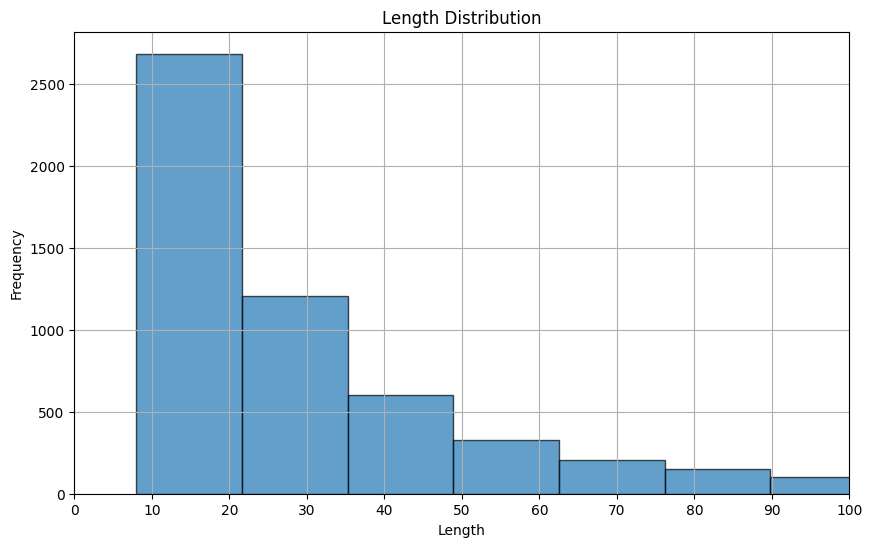

In [27]:
import pandas as pd  
import scipy.stats as stats
import matplotlib.pyplot as plt

data_path = "./data/processed_data_after_manual.xlsx" 
data = pd.read_excel(data_path, sheet_name = "processed")  # read the data
# re-confirm whether there was any incorrect emotion label in the data
unique_labels = data["emotion_label"].unique()
print("unique labels:", unique_labels)  

lengths = data["length"]  # obtain all data length in the dataset

max_length = lengths.max()  # the maximum value among these numbers
min_length = lengths.min()  # the minimum value among these numbers

print(f"The Maximum value of lengths: {max_length}")
print(f"The Minimum value of lengths: {min_length}")

length_mean = lengths.mean()  # the mean value among these numbers
print("length mean: ", length_mean)

length_median = lengths.median()
print("length median: ", length_median)  # the median value among these numbers

length_mode = lengths.mode()[0]  # the mode value among these numbers
mode_count = lengths.value_counts()[length_mode]  # how many times did this value occur
print("length_mode:", length_mode, "for", mode_count, "times")

# print quartiles of the data distribution
quartiles = lengths.quantile([0.25, 0.5, 0.75]).values
print(quartiles)

print(f"First quartile: {quartiles[0]}")
print(f"Third quartile: {quartiles[2]}")

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins = 30, edgecolor = "black", alpha = 0.7)
plt.title("Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.xlim(0, 500)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins = 30, edgecolor = "black", alpha = 0.7)
plt.title("Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.xlim(0, 100)
plt.xticks(np.arange(0, 110, 10))
plt.grid(True)
plt.show()

### View the deleted reviews during manual checking for the critical thinking.

In [6]:
import pandas as pd

manual_check_file          = pd.read_excel("./data/manual_check_data.xlsx")
original_manual_check_file = pd.read_excel("./data/original_manual_check_data_COPY.xlsx")

# First identify which rows in the "manual_check_data.xlsx" file were missing data, 
# deriving a boolean sequence.
# Then, use this sequence to obtain the corresponding "manual_index" from this file.
missing_content_index = manual_check_file[manual_check_file["content"].isnull()]["manual_index"]

# Use these "manual_index" to find the corresponding reviews in the "original_manual_check_data_COPY.xlsx" file.
# The "original_manual_check_data_COPY.xlsx" file kept all app review content.
had_dropped_data = original_manual_check_file[original_manual_check_file["manual_index"].isin(missing_content_index)]

had_dropped_data.to_excel("./data/had_dropped_data_for_critical_thinking.xlsx", index=False) 

### View the reviews whose scores and labels were changed during manual checking for the critical thinking.

In [7]:
import pandas as pd

reviews_with_current_scores  = pd.read_excel("./data/kappa_version.xlsx")
reviews_with_original_scores = pd.read_excel("./data/original_manual_check_data_COPY.xlsx")

# rename the specific columns
current_scores_renamed = reviews_with_current_scores.rename(columns = {"positive": "current_positive", "negative": "current_negative"})
original_scores_renamed = reviews_with_original_scores.rename(columns = {"positive": "previous_positive", "negative": "previous_negative"})

# During the merge operation, an inner join was performed using "manual_index", 
# and specify columns to be merged from EACH file.
merged_data = pd.merge(current_scores_renamed[["manual_index", "content", "current_positive", "current_negative"]],
                     original_scores_renamed[["manual_index", "previous_positive", "previous_negative"]],
                     on = "manual_index", how = "inner")

# Filter the app reviews data whose current emotion scores and original emotion scores differ,
# that was, the portion of the data where scores had been changed during manual checking.
dif_scores = merged_data[(merged_data["current_positive"] != merged_data["previous_positive"]) |
                    (merged_data["current_negative"] != merged_data["previous_negative"])]

dif_scores.to_excel("./data/changed_scores_for_critical_thinking.xlsx", index = False)

### Check data files distributed to colleagues, to see if any human error had been introduced.

In [86]:
import pandas as pd  # pip 
import numpy as np  # pip

def view_data(data):
    print("The shape of data: ", data.shape)
    print("The first 10 rows: \n", data.head(10))


def check_NaN(data):
    print("Checking NaN......")
    nan_exist = data.isna().any(axis=0).any()  # output of "data.isna().any(axis=0)"  might be  "content: True; score: False"
    
    if nan_exist:
        nan_rows = data[data.isna().any(axis=1)]  # rows
        amount = len(nan_rows) # how many NaN review rows the data had

        print("The NaN rows: \n{}\n\nThe number of rows with NaN: {}".format(nan_rows, amount))

        print("Deleting......")
        data.dropna(axis=0, inplace=True)  # drop the rows containing NaN
        print("These rows with NaN had been removed!")
        
    else:
        print("No NaN data detected")

In [107]:
# data_path = "./data/luobao_part1.xlsx" 
# data_path = "./data/mengmeng_part2.xlsx" 
# data_path = "./data/dongdong_part3.xlsx" 
# data_path = "./data/taotao_part4.xlsx" 
data_path = "./data/tongtong_part5.xlsx" 
data = pd.read_excel(data_path)
view_data(data)

The shape of data:  (1057, 6)
The first 10 rows: 
    manual_index                                            content  length  \
0         60421  one of the worst app. i have registered with m...      89   
1         63471  i can't earn line point... what line without b...      10   
2         58541  been using viber since a couple of years ago. ...      18   
3         32143  it's completely dead after updating absolutely...      20   
4          2408  my marketplace just disappeared i'm over 18 an...      26   
5         10914  hello sir my account freezed no like no views ...      41   
6         38194  way too many ads, continually popping up, cann...      11   
7         39664  doesn't open after the latest software update ...      23   
8          5851  i can edit messages now, but why can't i pin m...      12   
9         60510  cannot update line therefore cannot use line a...       8   

   positive  negative emotion_label  
0         1        -4      negative  
1         1   

In [108]:
check_NaN(data)
print("")
check_NaN(data)
print("")
view_data(data)

data = data[~(data["content"].str.isspace() | (data["content"] == ""))]  # check the null value further
view_data

Checking NaN......
No NaN data detected

Checking NaN......
No NaN data detected

The shape of data:  (1057, 6)
The first 10 rows: 
    manual_index                                            content  length  \
0         60421  one of the worst app. i have registered with m...      89   
1         63471  i can't earn line point... what line without b...      10   
2         58541  been using viber since a couple of years ago. ...      18   
3         32143  it's completely dead after updating absolutely...      20   
4          2408  my marketplace just disappeared i'm over 18 an...      26   
5         10914  hello sir my account freezed no like no views ...      41   
6         38194  way too many ads, continually popping up, cann...      11   
7         39664  doesn't open after the latest software update ...      23   
8          5851  i can edit messages now, but why can't i pin m...      12   
9         60510  cannot update line therefore cannot use line a...       8   

   posit

<function __main__.view_data(data)>

In [109]:
# Check if there were reviews whose emotional scores did not meet our standards: 
# positive scores range from 1 to 5, and negative scores range from -1 to -5. 

data_with_invalid_negative = data[~data["negative"].isin([-1, -2, -3, -4, -5])]
data_with_invalid_positive = data[~data["positive"].isin([1, 2, 3, 4, 5])]

print("Index for Invalid Negative Values:", data_with_invalid_negative["manual_index"].tolist())
print("Index for Invalid Positive Values:", data_with_invalid_positive["manual_index"].tolist())

Index for Invalid Negative Values: []
Index for Invalid Positive Values: []


In [110]:
# Verify whether the final emotion label of app reviews was calculated correctly during the manual checking process, 
# which involved comparing absolute values of the two emotional scores.

data["calculated_emotion_label"] = data.apply(
                                                lambda row: "positive" if abs(row["positive"]) > abs(row["negative"])
                                                else ("negative" if abs(row["negative"]) > abs(row["positive"])
                                                else "neutral"), axis=1)

# str.lower(): all emotion labels in one classmate's file had their first letter capitalized
mismatches = data[ data["emotion_label"].str.lower() != data["calculated_emotion_label"].str.lower() ]

print(f"There were totally {mismatches.shape[0]} emotion labels not matched.")  # how many rows?
print(mismatches)

There were totally 0 emotion labels not matched.
Empty DataFrame
Columns: [manual_index, content, length, positive, negative, emotion_label, calculated_emotion_label]
Index: []


In [111]:
# Re-examine briefly using the attribute of length
data["length_check"] = data["content"].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
data_with_mismatched_length = data[ data["length_check"] != data["length"] ]

print("Index for Mismatched Content Length:", data_with_mismatched_length["manual_index"].tolist())

Index for Mismatched Content Length: []


### Kappa Coefficient Calculation.

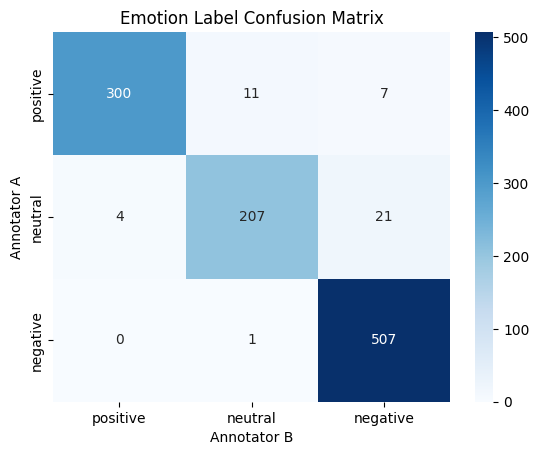

Statistics of emotion_label in the first dataset(graded by oneself): 
emotion_label
negative    508
positive    318
neutral     232
Name: count, dtype: int64

Statistics of emotion_label in the second dataset(graded by someone else): 
emotion_label
negative    535
positive    304
neutral     219
Name: count, dtype: int64

kappa coefficient: 0.9335070218139019


In [135]:
import pandas as pd  # pip
# Import libraries for kappa coefficient, confusion matrix, and tools for visualization.
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns 

data1 = pd.read_excel("./data/kappa_part_1.xlsx")  # graded by oneself
data2 = pd.read_excel("./data/luobao_part1.xlsx")  # graded by someone else

# all emotion labels in one classmate's file had their first letter capitalized
labels1 = data1["emotion_label"].str.lower()
labels2 = data2["emotion_label"].str.lower()

cm = confusion_matrix(labels1, labels2, labels=["positive", "neutral", "negative"])  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.title("Emotion Label Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

print("Statistics of emotion_label in the first dataset(graded by oneself): ")
print(labels1.value_counts())
print("\nStatistics of emotion_label in the second dataset(graded by someone else): ")
print(labels2.value_counts())

kappa = cohen_kappa_score(labels1, labels2)  # calculate the kappa coefficient using an API

print(f"\nkappa coefficient: {kappa}")

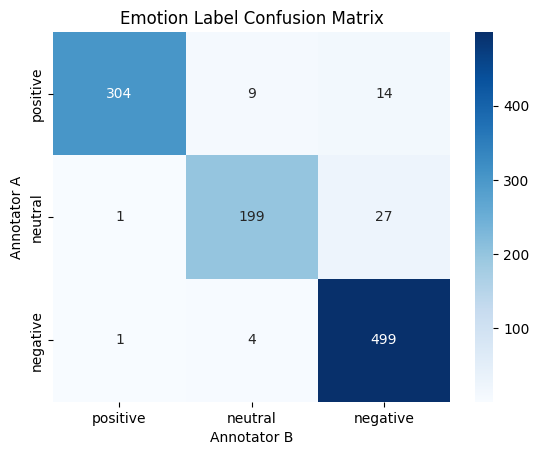

Statistics of emotion_label in the first dataset(graded by oneself): 
emotion_label
negative    504
positive    327
neutral     227
Name: count, dtype: int64

Statistics of emotion_label in the second dataset(graded by someone else): 
emotion_label
negative    540
positive    306
neutral     212
Name: count, dtype: int64

kappa coefficient: 0.9152410953652124


In [136]:
import pandas as pd  # pip
# Import libraries for kappa coefficient, confusion matrix, and tools for visualization.
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns 

data1 = pd.read_excel("./data/kappa_part_2.xlsx")  # graded by oneself
data2 = pd.read_excel("./data/mengmeng_part2.xlsx")  # graded by someone else

# all emotion labels in one classmate's file had their first letter capitalized
labels1 = data1["emotion_label"].str.lower()
labels2 = data2["emotion_label"].str.lower()

cm = confusion_matrix(labels1, labels2, labels=["positive", "neutral", "negative"])  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.title("Emotion Label Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

print("Statistics of emotion_label in the first dataset(graded by oneself): ")
print(labels1.value_counts())
print("\nStatistics of emotion_label in the second dataset(graded by someone else): ")
print(labels2.value_counts())

kappa = cohen_kappa_score(labels1, labels2)  # calculate the kappa coefficient using an API

print(f"\nkappa coefficient: {kappa}")

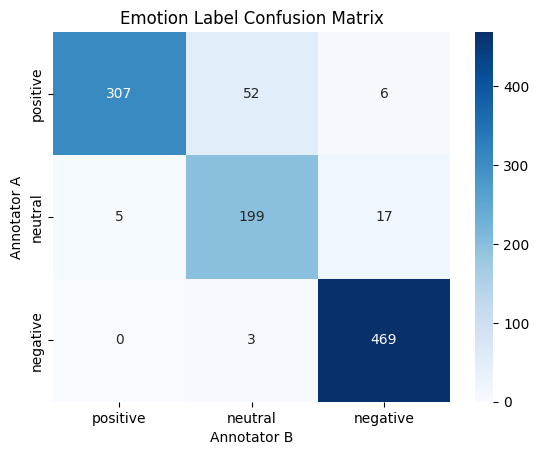

Statistics of emotion_label in the first dataset(graded by oneself): 
emotion_label
negative    472
positive    365
neutral     221
Name: count, dtype: int64

Statistics of emotion_label in the second dataset(graded by someone else): 
emotion_label
negative    492
positive    312
neutral     254
Name: count, dtype: int64

kappa coefficient: 0.8775473208334379


In [137]:
import pandas as pd  # pip
# Import libraries for kappa coefficient, confusion matrix, and tools for visualization.
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns 

data1 = pd.read_excel("./data/kappa_part_3.xlsx")  # graded by oneself
data2 = pd.read_excel("./data/dongdong_part3.xlsx")  # graded by someone else

# all emotion labels in one classmate's file had their first letter capitalized
labels1 = data1["emotion_label"].str.lower()
labels2 = data2["emotion_label"].str.lower()

cm = confusion_matrix(labels1, labels2, labels=["positive", "neutral", "negative"])  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.title("Emotion Label Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

print("Statistics of emotion_label in the first dataset(graded by oneself): ")
print(labels1.value_counts())
print("\nStatistics of emotion_label in the second dataset(graded by someone else): ")
print(labels2.value_counts())

kappa = cohen_kappa_score(labels1, labels2)  # calculate the kappa coefficient using an API

print(f"\nkappa coefficient: {kappa}")

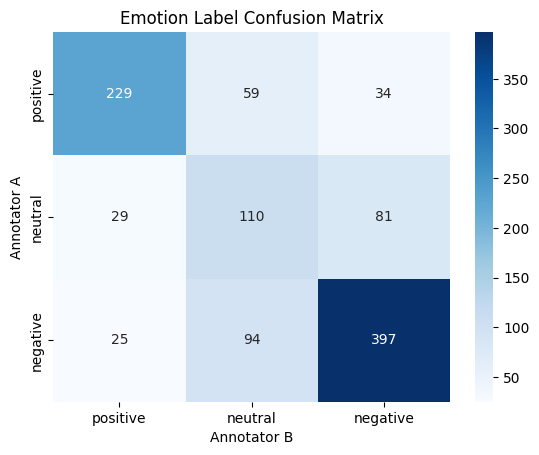

Statistics of emotion_label in the first dataset(graded by oneself): 
emotion_label
negative    516
positive    322
neutral     220
Name: count, dtype: int64

Statistics of emotion_label in the second dataset(graded by someone else): 
emotion_label
negative    512
positive    283
neutral     263
Name: count, dtype: int64

kappa coefficient: 0.5175831862993603


In [138]:
import pandas as pd  # pip
# Import libraries for kappa coefficient, confusion matrix, and tools for visualization.
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns 

data1 = pd.read_excel("./data/kappa_part_4.xlsx")  # graded by oneself
data2 = pd.read_excel("./data/taotao_part4.xlsx")  # graded by someone else

# all emotion labels in one classmate's file had their first letter capitalized
labels1 = data1["emotion_label"].str.lower()
labels2 = data2["emotion_label"].str.lower()

cm = confusion_matrix(labels1, labels2, labels=["positive", "neutral", "negative"])  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.title("Emotion Label Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

print("Statistics of emotion_label in the first dataset(graded by oneself): ")
print(labels1.value_counts())
print("\nStatistics of emotion_label in the second dataset(graded by someone else): ")
print(labels2.value_counts())

kappa = cohen_kappa_score(labels1, labels2)  # calculate the kappa coefficient using an API

print(f"\nkappa coefficient: {kappa}")

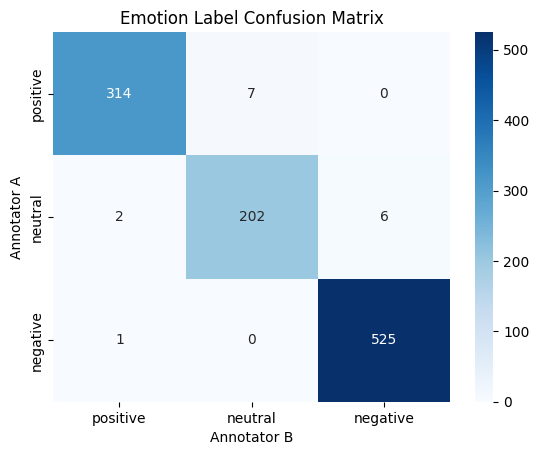

Statistics of emotion_label in the first dataset(graded by oneself): 
emotion_label
negative    526
positive    321
neutral     210
Name: count, dtype: int64

Statistics of emotion_label in the second dataset(graded by someone else): 
emotion_label
negative    531
positive    317
neutral     209
Name: count, dtype: int64

kappa coefficient: 0.9755711429793037


In [139]:
import pandas as pd  # pip
# Import libraries for kappa coefficient, confusion matrix, and tools for visualization.
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns 

data1 = pd.read_excel("./data/kappa_part_5.xlsx")  # graded by oneself
data2 = pd.read_excel("./data/tongtong_part5.xlsx")  # graded by someone else

# all emotion labels in one classmate's file had their first letter capitalized
labels1 = data1["emotion_label"].str.lower()
labels2 = data2["emotion_label"].str.lower()

cm = confusion_matrix(labels1, labels2, labels=["positive", "neutral", "negative"])  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.title("Emotion Label Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

print("Statistics of emotion_label in the first dataset(graded by oneself): ")
print(labels1.value_counts())
print("\nStatistics of emotion_label in the second dataset(graded by someone else): ")
print(labels2.value_counts())

kappa = cohen_kappa_score(labels1, labels2)  # calculate the kappa coefficient using an API

print(f"\nkappa coefficient: {kappa}")

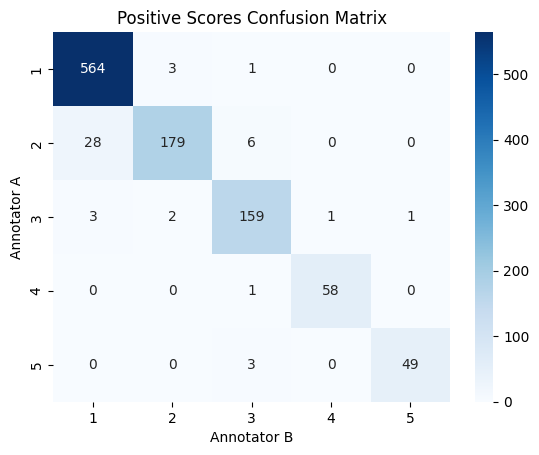

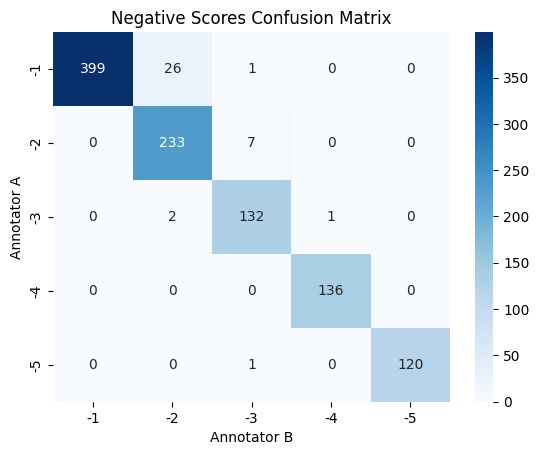

kappa coefficient of positive scores: 0.9267676303942163
kappa coefficient of negative scores: 0.9518262851336567

average kappa: 0.9392969577639365


In [140]:
import pandas as pd  # pip
# Import libraries for kappa coefficient, confusion matrix, and tools for visualization.
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns 

data1 = pd.read_excel("./data/kappa_part_1.xlsx")  # graded by oneself
data2 = pd.read_excel("./data/luobao_part1.xlsx")  # graded by someone else

positive_scores_1 = data1["positive"]
negative_scores_1 = data1["negative"]
positive_scores_2 = data2["positive"]
negative_scores_2 = data2["negative"]

positive_standard = [1, 2, 3, 4, 5]  # positive scores
cm_positive = confusion_matrix(positive_scores_1, positive_scores_2, labels=positive_standard)  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm_positive, annot=True, fmt="d", cmap="Blues", xticklabels=positive_standard, yticklabels=positive_standard)
plt.title("Positive Scores Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

negative_standard = [-1, -2, -3, -4, -5]  # negative scores
cm_negative = confusion_matrix(negative_scores_1, negative_scores_2, labels=negative_standard)  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm_negative, annot=True, fmt="d", cmap="Blues", xticklabels=negative_standard, yticklabels=negative_standard)
plt.title("Negative Scores Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

# calculate the kappa coefficient using an API
kappa_positive = cohen_kappa_score(positive_scores_1, positive_scores_2)
kappa_negative = cohen_kappa_score(negative_scores_1, negative_scores_2)

print(f"kappa coefficient of positive scores: {kappa_positive}")
print(f"kappa coefficient of negative scores: {kappa_negative}")

kappa_avg = (kappa_positive + kappa_negative) / 2
print(f"\naverage kappa: {kappa_avg}")

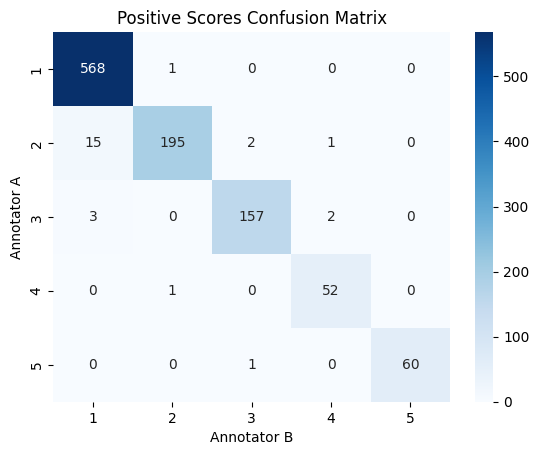

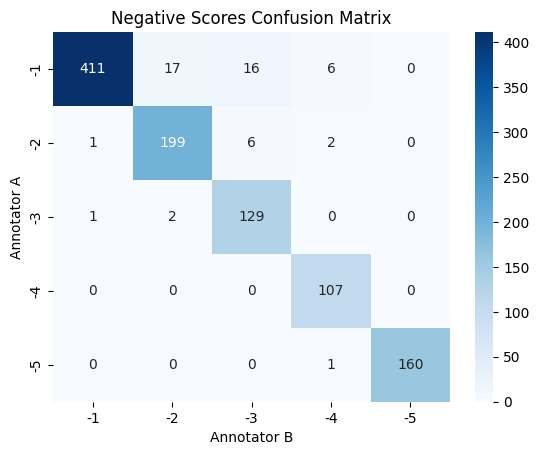

kappa coefficient of positive scores: 0.9613366054135499
kappa coefficient of negative scores: 0.9337209330342406

average kappa: 0.9475287692238953


In [141]:
import pandas as pd  # pip
# Import libraries for kappa coefficient, confusion matrix, and tools for visualization.
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns 

data1 = pd.read_excel("./data/kappa_part_2.xlsx")  # graded by oneself
data2 = pd.read_excel("./data/mengmeng_part2.xlsx")  # graded by someone else

positive_scores_1 = data1["positive"]
negative_scores_1 = data1["negative"]
positive_scores_2 = data2["positive"]
negative_scores_2 = data2["negative"]

positive_standard = [1, 2, 3, 4, 5]  # positive scores
cm_positive = confusion_matrix(positive_scores_1, positive_scores_2, labels=positive_standard)  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm_positive, annot=True, fmt="d", cmap="Blues", xticklabels=positive_standard, yticklabels=positive_standard)
plt.title("Positive Scores Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

negative_standard = [-1, -2, -3, -4, -5]  # negative scores
cm_negative = confusion_matrix(negative_scores_1, negative_scores_2, labels=negative_standard)  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm_negative, annot=True, fmt="d", cmap="Blues", xticklabels=negative_standard, yticklabels=negative_standard)
plt.title("Negative Scores Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

# calculate the kappa coefficient using an API
kappa_positive = cohen_kappa_score(positive_scores_1, positive_scores_2)
kappa_negative = cohen_kappa_score(negative_scores_1, negative_scores_2)

print(f"kappa coefficient of positive scores: {kappa_positive}")
print(f"kappa coefficient of negative scores: {kappa_negative}")

kappa_avg = (kappa_positive + kappa_negative) / 2
print(f"\naverage kappa: {kappa_avg}")

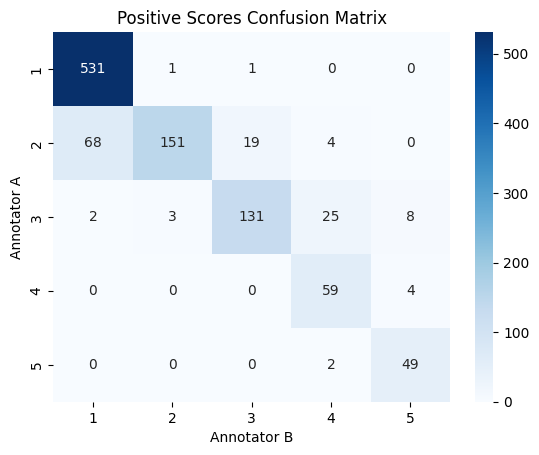

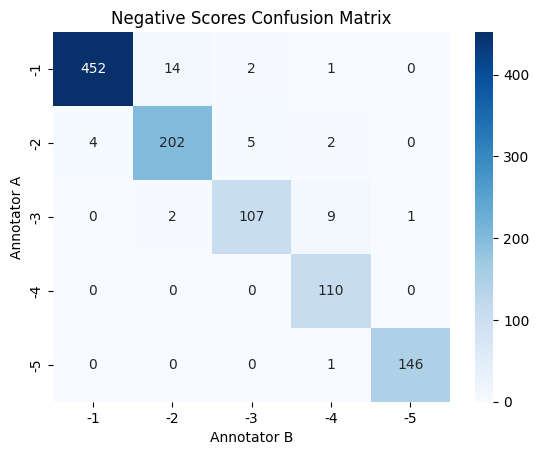

kappa coefficient of positive scores: 0.8006850737258687
kappa coefficient of negative scores: 0.9464707704344113

average kappa: 0.8735779220801401


In [142]:
import pandas as pd  # pip
# Import libraries for kappa coefficient, confusion matrix, and tools for visualization.
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns 

data1 = pd.read_excel("./data/kappa_part_3.xlsx")  # graded by oneself
data2 = pd.read_excel("./data/dongdong_part3.xlsx")  # graded by someone else

positive_scores_1 = data1["positive"]
negative_scores_1 = data1["negative"]
positive_scores_2 = data2["positive"]
negative_scores_2 = data2["negative"]

positive_standard = [1, 2, 3, 4, 5]  # positive scores
cm_positive = confusion_matrix(positive_scores_1, positive_scores_2, labels=positive_standard)  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm_positive, annot=True, fmt="d", cmap="Blues", xticklabels=positive_standard, yticklabels=positive_standard)
plt.title("Positive Scores Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

negative_standard = [-1, -2, -3, -4, -5]  # negative scores
cm_negative = confusion_matrix(negative_scores_1, negative_scores_2, labels=negative_standard)  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm_negative, annot=True, fmt="d", cmap="Blues", xticklabels=negative_standard, yticklabels=negative_standard)
plt.title("Negative Scores Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

# calculate the kappa coefficient using an API
kappa_positive = cohen_kappa_score(positive_scores_1, positive_scores_2)
kappa_negative = cohen_kappa_score(negative_scores_1, negative_scores_2)

print(f"kappa coefficient of positive scores: {kappa_positive}")
print(f"kappa coefficient of negative scores: {kappa_negative}")

kappa_avg = (kappa_positive + kappa_negative) / 2
print(f"\naverage kappa: {kappa_avg}")

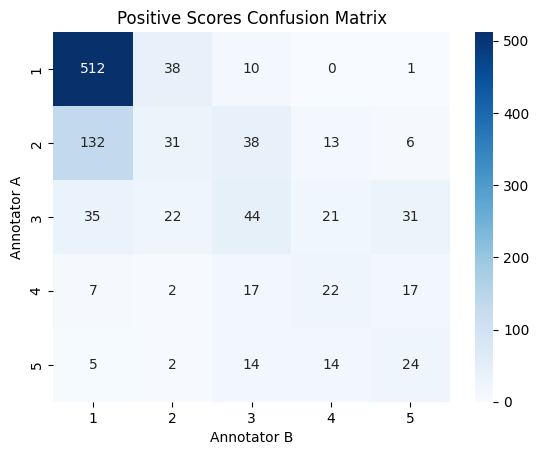

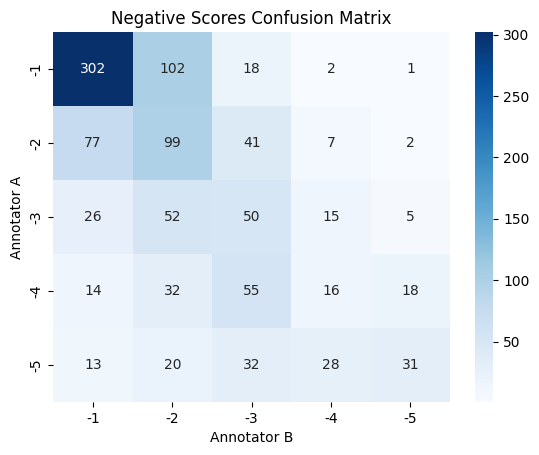

kappa coefficient of positive scores: 0.3414452322333743
kappa coefficient of negative scores: 0.2788511863754872

average kappa: 0.31014820930443077


In [143]:
import pandas as pd  # pip
# Import libraries for kappa coefficient, confusion matrix, and tools for visualization.
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns 

data1 = pd.read_excel("./data/kappa_part_4.xlsx")  # graded by oneself
data2 = pd.read_excel("./data/taotao_part4.xlsx")  # graded by someone else

positive_scores_1 = data1["positive"]
negative_scores_1 = data1["negative"]
positive_scores_2 = data2["positive"]
negative_scores_2 = data2["negative"]

positive_standard = [1, 2, 3, 4, 5]  # positive scores
cm_positive = confusion_matrix(positive_scores_1, positive_scores_2, labels=positive_standard)  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm_positive, annot=True, fmt="d", cmap="Blues", xticklabels=positive_standard, yticklabels=positive_standard)
plt.title("Positive Scores Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

negative_standard = [-1, -2, -3, -4, -5]  # negative scores
cm_negative = confusion_matrix(negative_scores_1, negative_scores_2, labels=negative_standard)  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm_negative, annot=True, fmt="d", cmap="Blues", xticklabels=negative_standard, yticklabels=negative_standard)
plt.title("Negative Scores Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

# calculate the kappa coefficient using an API
kappa_positive = cohen_kappa_score(positive_scores_1, positive_scores_2)
kappa_negative = cohen_kappa_score(negative_scores_1, negative_scores_2)

print(f"kappa coefficient of positive scores: {kappa_positive}")
print(f"kappa coefficient of negative scores: {kappa_negative}")

kappa_avg = (kappa_positive + kappa_negative) / 2
print(f"\naverage kappa: {kappa_avg}")

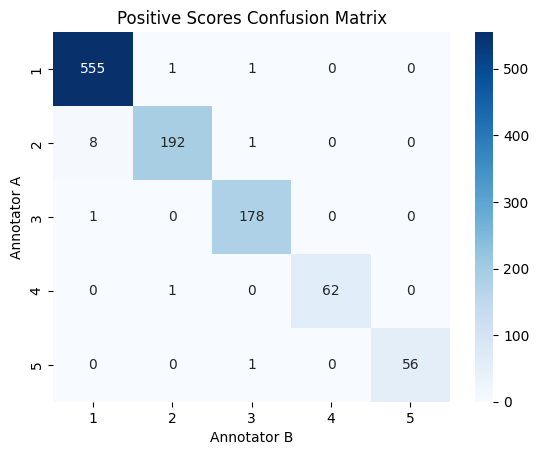

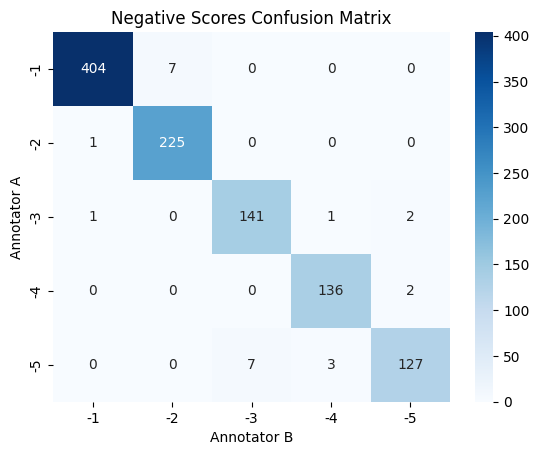

kappa coefficient of positive scores: 0.9795779798788313
kappa coefficient of negative scores: 0.9697720751551433

average kappa: 0.9746750275169873


In [144]:
import pandas as pd  # pip
# Import libraries for kappa coefficient, confusion matrix, and tools for visualization.
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns 

data1 = pd.read_excel("./data/kappa_part_5.xlsx")  # graded by oneself
data2 = pd.read_excel("./data/tongtong_part5.xlsx")  # graded by someone else

positive_scores_1 = data1["positive"]
negative_scores_1 = data1["negative"]
positive_scores_2 = data2["positive"]
negative_scores_2 = data2["negative"]

positive_standard = [1, 2, 3, 4, 5]  # positive scores
cm_positive = confusion_matrix(positive_scores_1, positive_scores_2, labels=positive_standard)  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm_positive, annot=True, fmt="d", cmap="Blues", xticklabels=positive_standard, yticklabels=positive_standard)
plt.title("Positive Scores Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

negative_standard = [-1, -2, -3, -4, -5]  # negative scores
cm_negative = confusion_matrix(negative_scores_1, negative_scores_2, labels=negative_standard)  # generate the confusion matrix
# optimize the visualization of this confusion matrix, to make it more intuitive
sns.heatmap(cm_negative, annot=True, fmt="d", cmap="Blues", xticklabels=negative_standard, yticklabels=negative_standard)
plt.title("Negative Scores Confusion Matrix")
plt.ylabel("Annotator A")
plt.xlabel("Annotator B")
plt.show()

# calculate the kappa coefficient using an API
kappa_positive = cohen_kappa_score(positive_scores_1, positive_scores_2)
kappa_negative = cohen_kappa_score(negative_scores_1, negative_scores_2)

print(f"kappa coefficient of positive scores: {kappa_positive}")
print(f"kappa coefficient of negative scores: {kappa_negative}")

kappa_avg = (kappa_positive + kappa_negative) / 2
print(f"\naverage kappa: {kappa_avg}")

### Analyze the frequency and distribution of multi-label tags within the dataset.

score_pair
(1, -5)    531
(1, -4)    426
(1, -3)    398
(1, -2)    721
(1, -1)    712
(2, -5)     92
(2, -4)    104
(2, -3)    117
(2, -2)    246
(2, -1)    530
(3, -5)     39
(3, -4)     78
(3, -3)    131
(3, -2)     92
(3, -1)    489
(4, -5)     20
(4, -4)     13
(4, -3)     25
(4, -2)     36
(4, -1)    209
(5, -5)      8
(5, -4)      5
(5, -3)      8
(5, -2)     18
(5, -1)    241
Name: count, dtype: int64


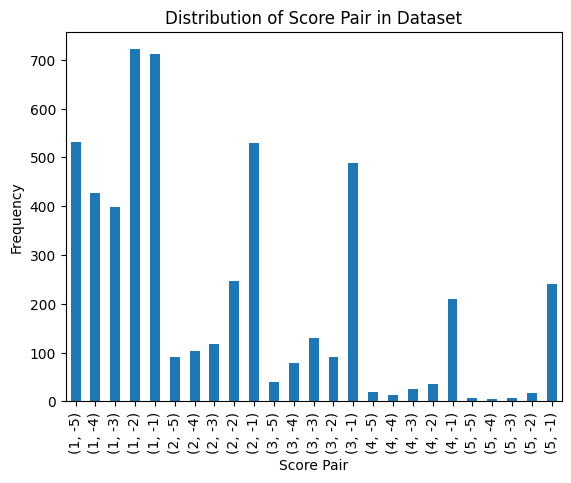

In [12]:
import pandas as pd  # pip
import matplotlib.pyplot as plt  # pip

data_path = "./data/processed_data_after_manual.xlsx"  # data finished the manual checking process
data = pd.read_excel(data_path)  # read the data file
data["score_pair"] = list(zip(data["positive"], data["negative"]))  # create (positive, negative) score pairs

score_pair_counts = data["score_pair"].value_counts()  # statistics

score_pair_counts = score_pair_counts.sort_index()  # based on the numerical order of the postive score in pairs
print(score_pair_counts)

score_pair_counts.plot(kind="bar")
plt.xlabel("Score Pair")
plt.ylabel("Frequency")
plt.title("Distribution of Score Pair in Dataset")
plt.show()

score_pair
(1, -5)       7
(1, -4)     200
(1, -3)     357
(1, -2)     652
(1, -1)    1162
(2, -5)       3
(2, -4)     128
(2, -3)     236
(2, -2)     512
(2, -1)     926
(3, -4)      62
(3, -3)     127
(3, -2)     254
(3, -1)     577
(4, -5)       2
(4, -4)       6
(4, -3)       5
(4, -2)      30
(4, -1)      42
(5, -1)       1
Name: count, dtype: int64


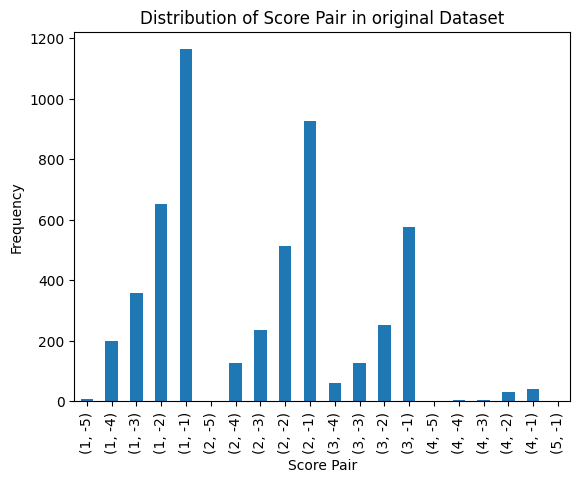

In [13]:
import pandas as pd  # pip
import matplotlib.pyplot as plt  # pip

data_path = "./data/filtered_data_without_manual_check.xlsx"  # data before the manual checking process
data = pd.read_excel(data_path)  # read the data file
data["score_pair"] = list(zip(data["positive"], data["negative"]))  # create (positive, negative) score pairs

score_pair_counts = data["score_pair"].value_counts()  # statistics

score_pair_counts = score_pair_counts.sort_index()  # based on the numerical order of the postive score in pairs
print(score_pair_counts)

score_pair_counts.plot(kind="bar")
plt.xlabel("Score Pair")
plt.ylabel("Frequency")
plt.title("Distribution of Score Pair in original Dataset")
plt.show()

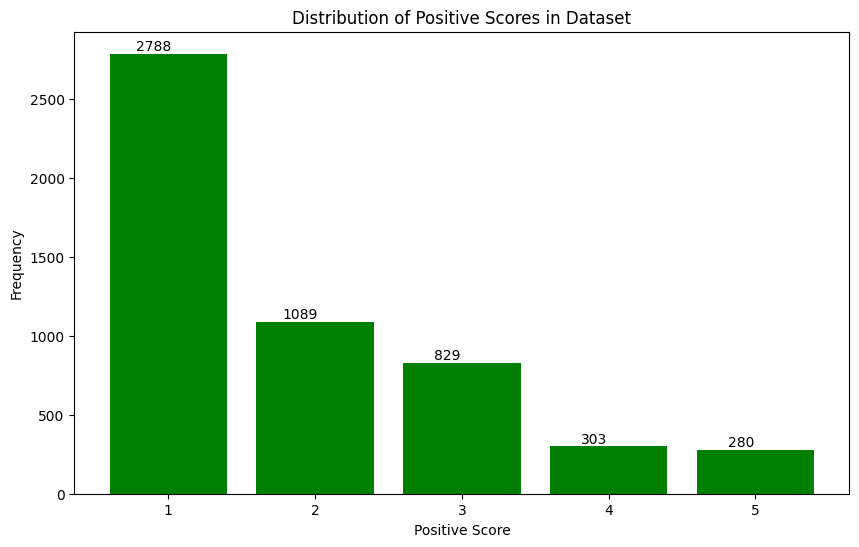

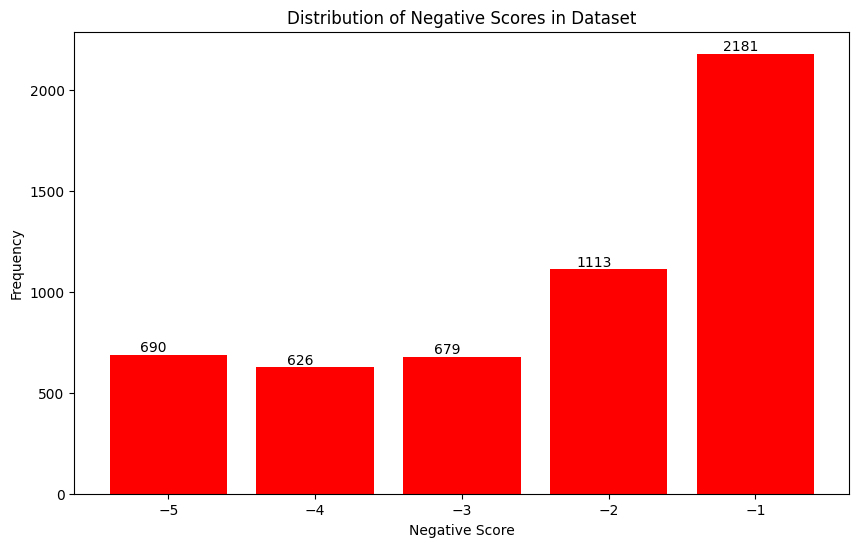

In [14]:
import pandas as pd  # pip 
import matplotlib.pyplot as plt  # pip

data_path = "./data/processed_data_after_manual.xlsx"  # data finished the manual checking process
data = pd.read_excel(data_path)  # read the data file

positive_score_counts = data["positive"].value_counts().sort_index()  # positive score statistics
negative_score_counts = data["negative"].value_counts().sort_index()  # negative score statistics

# visualization for the positive score distribution
plt.figure(figsize=(10, 6)) 
positive_bars = plt.bar(positive_score_counts.index, positive_score_counts.values, color="green")

# show the exact digits
for bar in positive_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, yval, va="bottom", ha="center") 

plt.xlabel("Positive Score")
plt.ylabel("Frequency")
plt.title("Distribution of Positive Scores in Dataset")
plt.show()


# visualization for the negative score distribution
plt.figure(figsize=(10, 6))
negative_bars = plt.bar(negative_score_counts.index, negative_score_counts.values, color="red")

# show the exact digits
for bar in negative_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, yval, va="bottom", ha="center")  

plt.xlabel("Negative Score")
plt.ylabel("Frequency")
plt.title("Distribution of Negative Scores in Dataset")
plt.show()

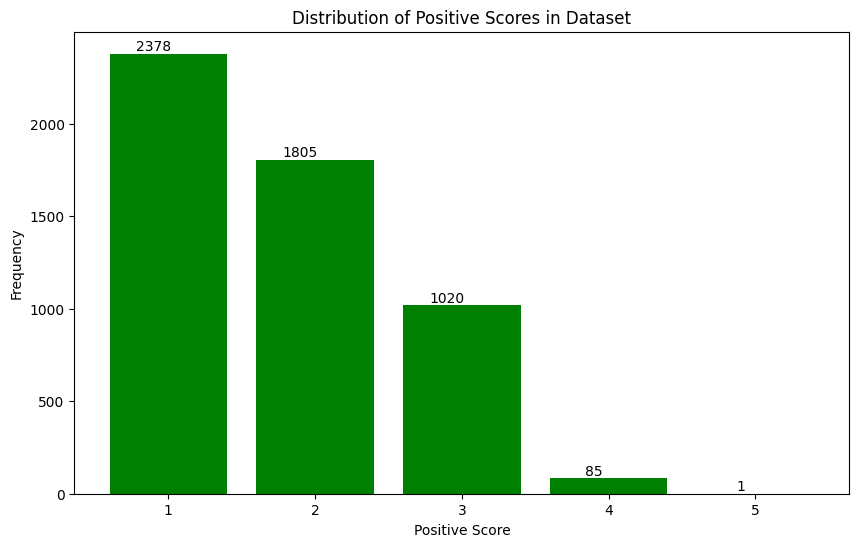

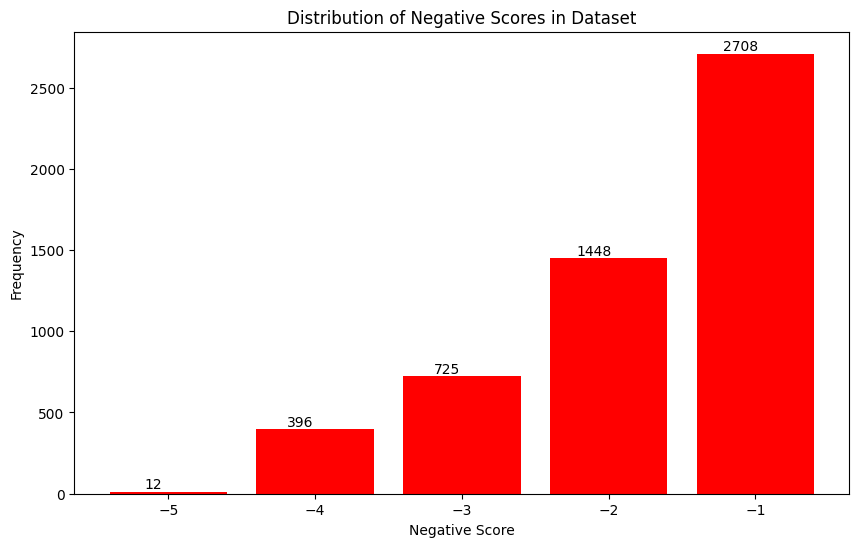

In [15]:
import pandas as pd  # pip 
import matplotlib.pyplot as plt  # pip

data_path = "./data/filtered_data_without_manual_check.xlsx"  # data before the manual checking process
data = pd.read_excel(data_path)  # read the data file

positive_score_counts = data["positive"].value_counts().sort_index()  # positive score statistics
negative_score_counts = data["negative"].value_counts().sort_index()  # negative score statistics

# visualization for the positive score distribution
plt.figure(figsize=(10, 6)) 
positive_bars = plt.bar(positive_score_counts.index, positive_score_counts.values, color="green")

# show the exact digits
for bar in positive_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, yval, va="bottom", ha="center") 

plt.xlabel("Positive Score")
plt.ylabel("Frequency")
plt.title("Distribution of Positive Scores in Dataset")
plt.show()


# visualization for the negative score distribution
plt.figure(figsize=(10, 6))
negative_bars = plt.bar(negative_score_counts.index, negative_score_counts.values, color="red")

# show the exact digits
for bar in negative_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, yval, va="bottom", ha="center")  

plt.xlabel("Negative Score")
plt.ylabel("Frequency")
plt.title("Distribution of Negative Scores in Dataset")
plt.show()

### Introducing noise manually to enable multi-label classifiers to function properly, for the file without manual checking, which had very **imbalanced** labels.

In [1]:
import pandas as pd  # pip
from openpyxl import load_workbook  # pip

# read the xlsx file using the load_workbook() from the openpyxl library
book = load_workbook("./data/filtered_data_without_manual_check.xlsx") 
sheet = book.active  # catch the current active sheet
sheet.title = "processed"  # change the sheet name
book.save("./data/filtered_data_without_manual_check.xlsx")  # re-save this file

In [2]:
import pandas as pd  # pip
import numpy as np  # pip

file_path = "./data/filtered_data_without_manual_check.xlsx"
df = pd.read_excel(file_path)  # read the file

# filter all app reviews in "df" where positive value was 1 and negative value was -1
# since they had the highest quantity
filtered_df = df[(df["positive"] == 1) & (df["negative"] == -1)]
# print(filtered_df)

# randomly select the 30 review index from "filtered_df", with the seed
sampled_indices = filtered_df.sample(n=30, random_state=68).index
# print(sampled_indices)

# change positive socres to 5 for the first 15 randomly selected data points
df.loc[sampled_indices[:15], "positive"] = 5
# change negative scores to -5 for the last 15 randomly selected data points
df.loc[sampled_indices[15:], "negative"] = -5

# save this modified data to a new xlsx file, NOT affecting other multi-label or multi-class tasks!
new_file_path = "./data/filtered_data_without_manual_check_version2.xlsx"
df.to_excel(new_file_path, index=False, sheet_name="processed")

print("The file had already been improved and saved: ", new_file_path)

The file had already been improved and saved:  ./data/filtered_data_without_manual_check_version2.xlsx


In [3]:
import pandas as pd

reviews_with_current_scores  = pd.read_excel("./data/filtered_data_without_manual_check_version2.xlsx")
reviews_with_original_scores = pd.read_excel("./data/filtered_data_without_manual_check.xlsx")

# rename the specific columns
current_scores_renamed = reviews_with_current_scores.rename(columns = {"positive": "current_positive", "negative": "current_negative"})
original_scores_renamed = reviews_with_original_scores.rename(columns = {"positive": "previous_positive", "negative": "previous_negative"})

# During the merge operation, an inner join was performed using "manual_index", 
# and specify columns to be merged from EACH file.
merged_data = pd.merge(current_scores_renamed[["manual_index", "content", "current_positive", "current_negative"]],
                     original_scores_renamed[["manual_index", "previous_positive", "previous_negative"]],
                     on = "manual_index", how = "inner")

# Filter the app reviews data whose current emotion scores and original emotion scores differ
dif_scores = merged_data[(merged_data["current_positive"] != merged_data["previous_positive"]) |
                    (merged_data["current_negative"] != merged_data["previous_negative"])]

# check whose emotion scores of reviews had been changed
dif_scores.to_excel("./data/check_score_change.xlsx", index = False) 

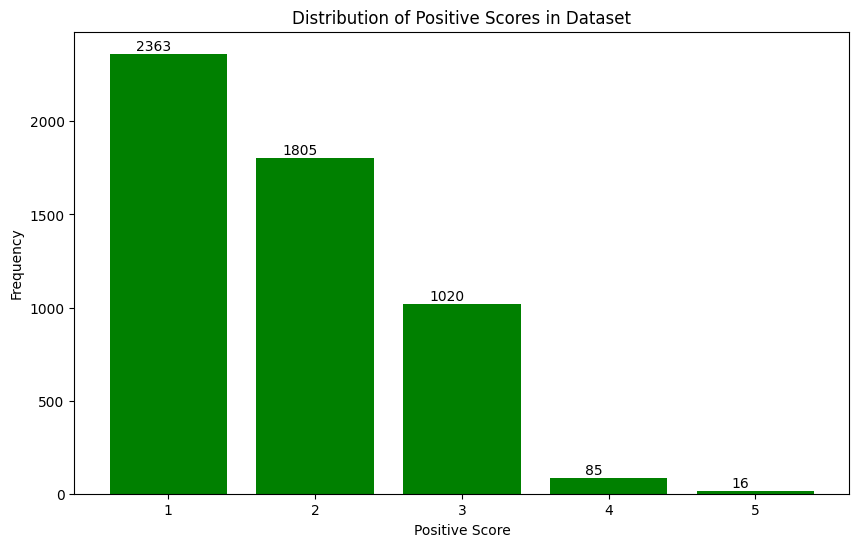

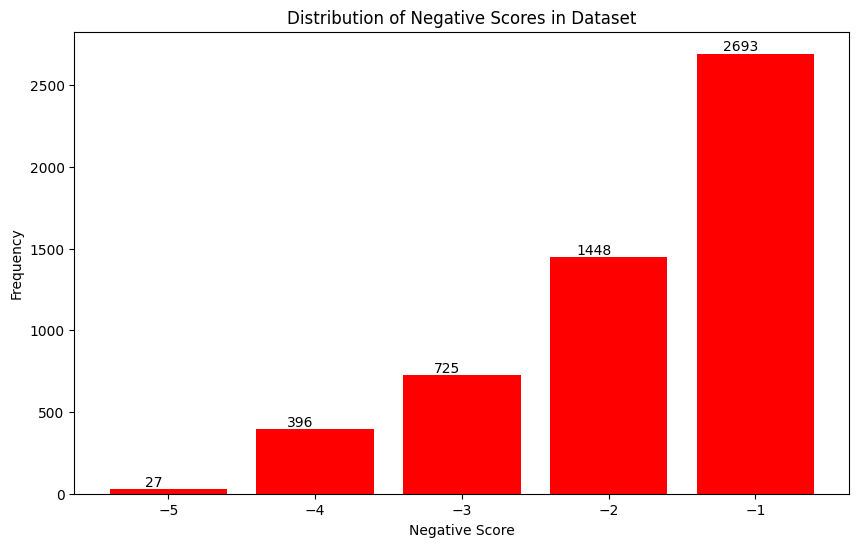

In [4]:
import pandas as pd  # pip 
import matplotlib.pyplot as plt  # pip

data_path = "./data/filtered_data_without_manual_check_version2.xlsx"
data = pd.read_excel(data_path)  # read the data file

positive_score_counts = data["positive"].value_counts().sort_index()  # positive score statistics
negative_score_counts = data["negative"].value_counts().sort_index()  # negative score statistics

# visualization for the positive score distribution
plt.figure(figsize=(10, 6)) 
positive_bars = plt.bar(positive_score_counts.index, positive_score_counts.values, color="green")

# show the exact digits
for bar in positive_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, yval, va="bottom", ha="center") 

plt.xlabel("Positive Score")
plt.ylabel("Frequency")
plt.title("Distribution of Positive Scores in Dataset")
plt.show()


# visualization for the negative score distribution
plt.figure(figsize=(10, 6))
negative_bars = plt.bar(negative_score_counts.index, negative_score_counts.values, color="red")

# show the exact digits
for bar in negative_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, yval, va="bottom", ha="center")  

plt.xlabel("Negative Score")
plt.ylabel("Frequency")
plt.title("Distribution of Negative Scores in Dataset")
plt.show()

### Statistical analysis on the length of reviews for each emotion.

In [12]:
import pandas as pd
import re

df = pd.read_excel("./data/processed_data_after_manual.xlsx")  # read the data
df["length"] = pd.to_numeric(df["length"], errors="coerce")  # data was converted to the numerical form
grouped = df.groupby("emotion_label")["length"].describe()  # statistical analysis
print(grouped)  # print results


print("\nAfter removing some punctuation marks:\n")


def remove_useless_char(review):
    review = re.sub(r'[^a-zA-Z0-9]', ' ', review)  # only keep words+numbers
    review = re.sub(r'[\s]+', ' ', review)  # avoid long spacing
    review = review.strip()  # format adjustment
    return review

df = pd.read_excel("./data/processed_data_after_manual.xlsx")  # read the data
df["content_cleaned"] = df["content"].apply(remove_useless_char)  # only keep words+numbers
df["content_cleaned"] = df["content_cleaned"].str.lower()  # lowercase
df["new_length"] = df["content_cleaned"].str.split(r'\s+').apply(len)  # how many "words" did one sentence hold
df["new_length"] = pd.to_numeric(df["new_length"], errors='coerce')  # new length column
new_grouped = df.groupby("emotion_label")["new_length"].describe()  # statistical analysis
print(new_grouped)  # print results

                count       mean        std  min   25%   50%   75%    max
emotion_label                                                            
negative       2526.0  33.391132  22.884519  8.0  16.0  26.0  44.0  112.0
neutral        1110.0  24.035135  18.606010  8.0  11.0  17.0  30.0  102.0
positive       1653.0  23.823956  19.666649  8.0  12.0  18.0  29.0  417.0

After removing some punctuation marks:

                count       mean        std  min   25%   50%   75%    max
emotion_label                                                            
negative       2526.0  34.369359  23.478276  7.0  16.0  27.0  45.0  113.0
neutral        1110.0  24.738739  19.110476  8.0  12.0  18.0  30.0  104.0
positive       1653.0  24.350877  19.952160  7.0  12.0  18.0  30.0  418.0
